#import

In [8]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score
from sklearn.model_selection import train_test_split , GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder , StandardScaler


# 데이터 불러오기


In [12]:
df = pd.read_csv('/content/data.csv')

#EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
print(df.shape)

(6819, 96)


In [39]:
# 결측치가 있는 열의 이름을 출력
[print(col) for col in df if df[col].isna().sum() > 0]

[]

In [8]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [9]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [20]:
# 'Bankrupt?' 열의 고유 값과 빈도 세기
bankrupt_counts = df['Bankrupt?'].value_counts()
print(bankrupt_counts)

labels = new_df['Bankrupt?']

Bankrupt?
0    6599
1     220
Name: count, dtype: int64


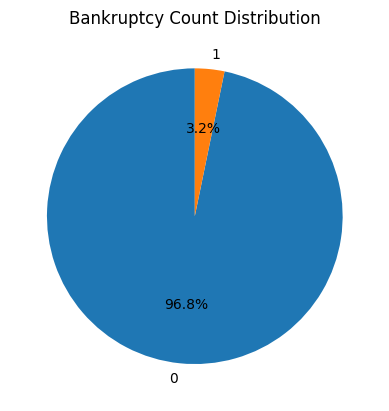

In [33]:
#pie그래프로 비율 나타내기
bankrupt_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Bankruptcy Count Distribution')
plt.ylabel('')  # y축 레이블 제거
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

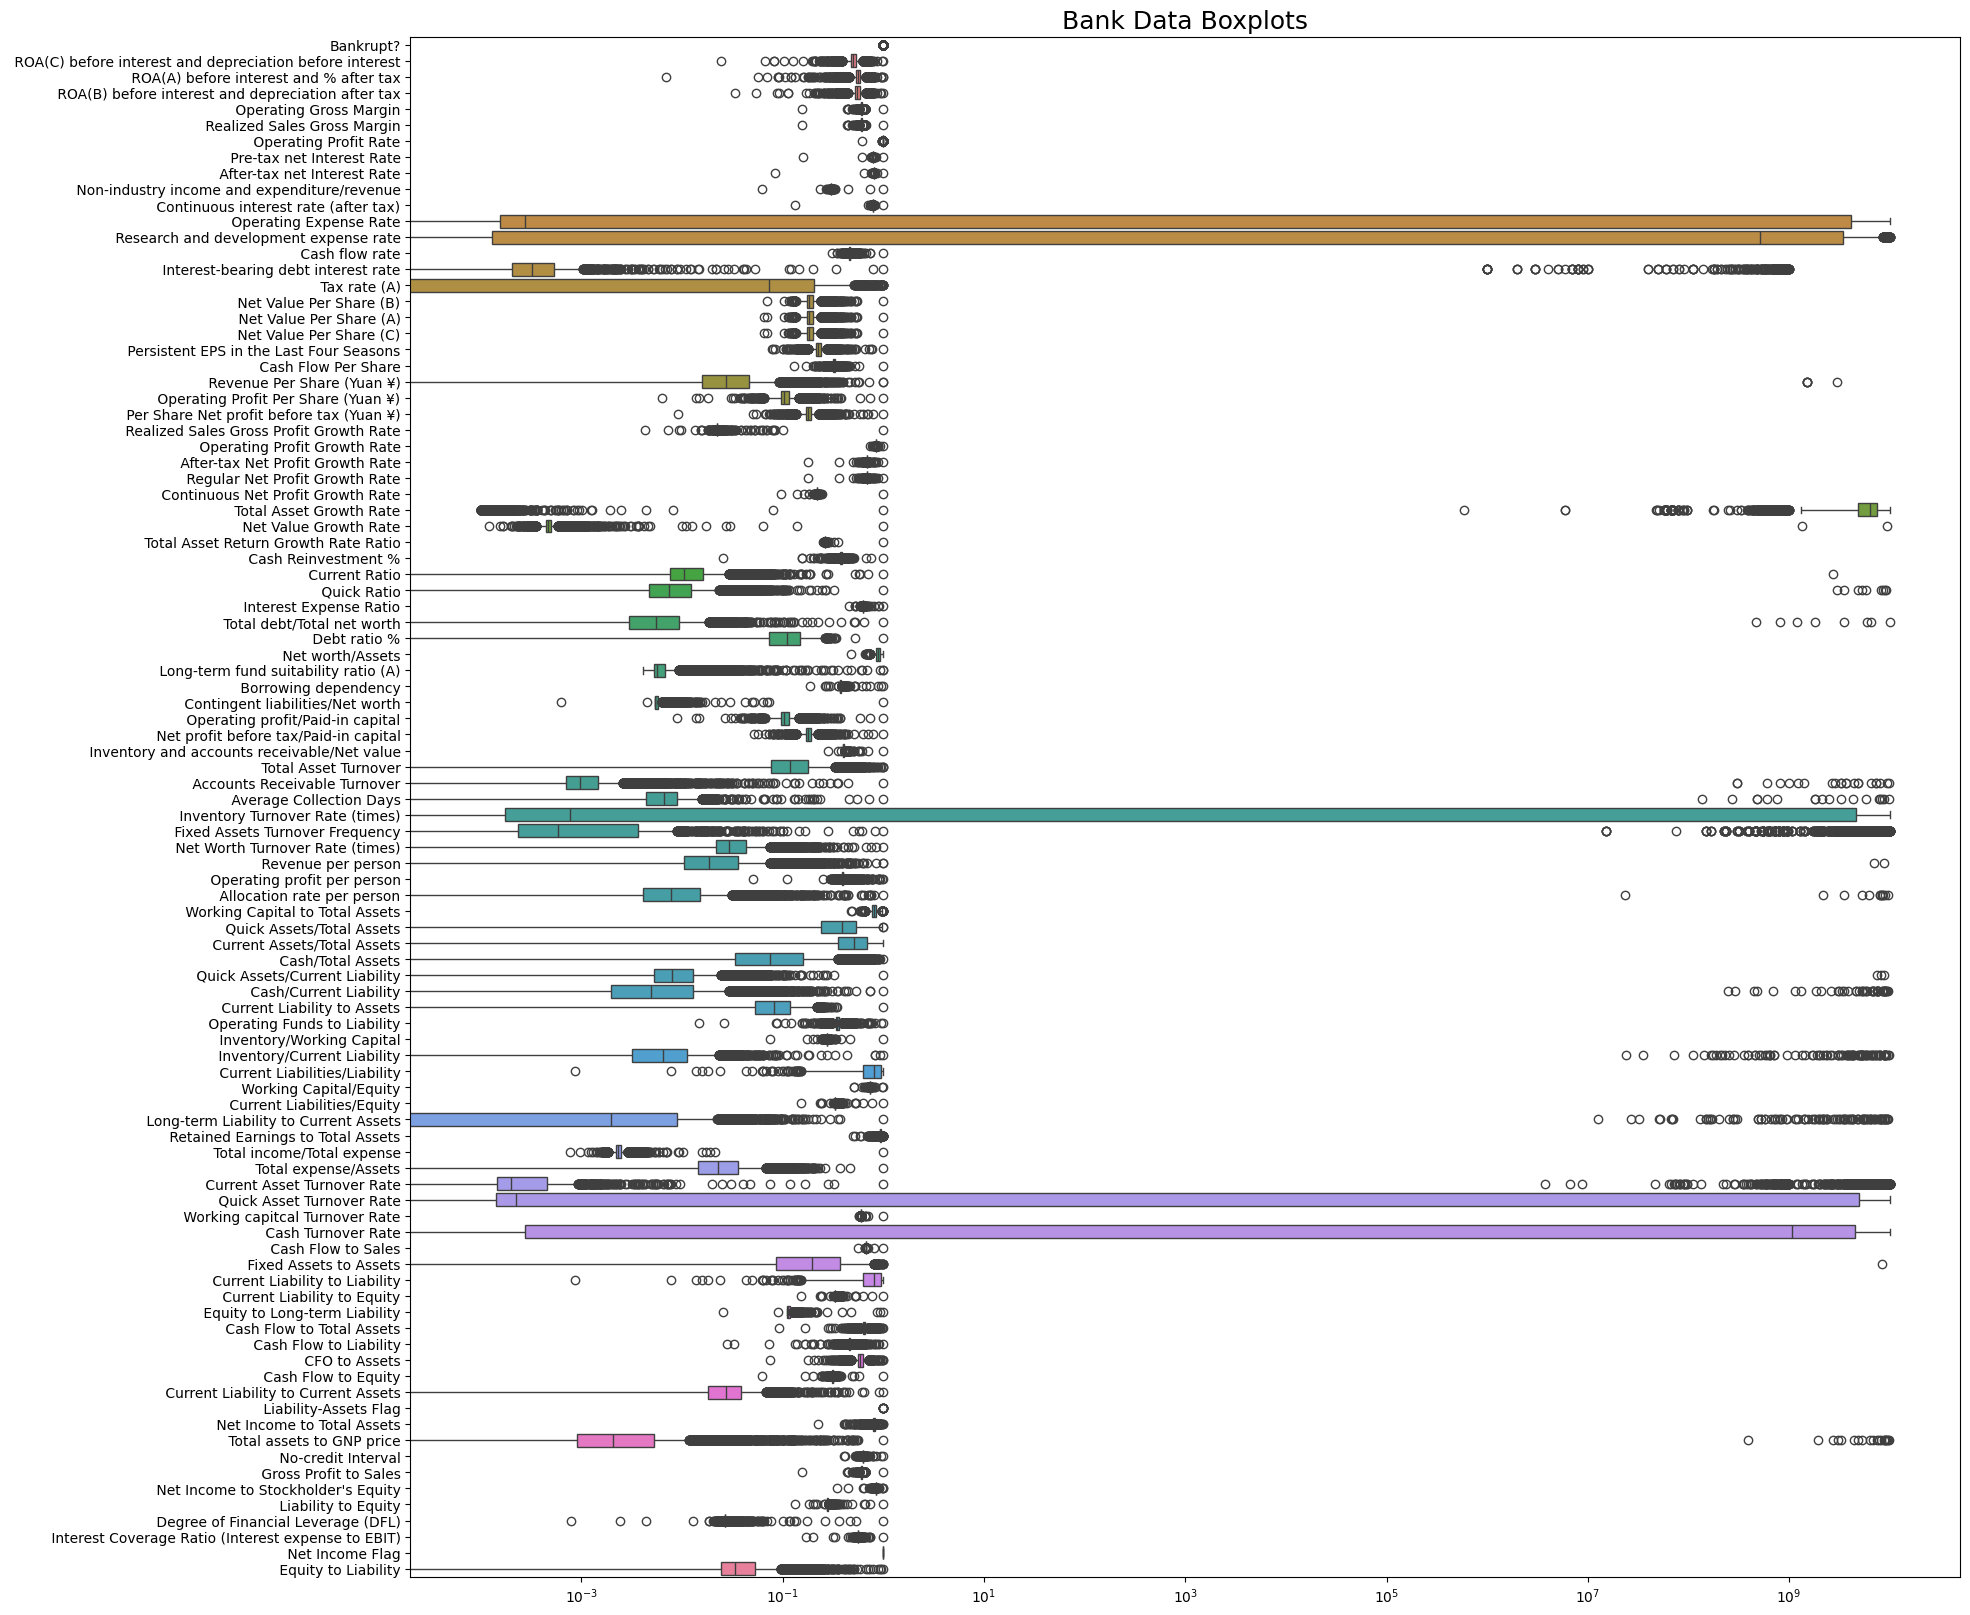

In [13]:
#이상치 확인 위한 박스플롯

plt.figure(figsize=(20, 20))  # 그래프 크기 설정
ax = sns.boxplot(data=df, orient="h")  # 수치형 데이터의 박스플롯 생성 (수평 방향)
ax.set_title('Bank Data Boxplots', fontsize=18)  # 그래프 제목 설정
ax.set(xscale="log")  # x축을 로그 스케일로 설정
plt.show()  # 그래프 출력

<Axes: >

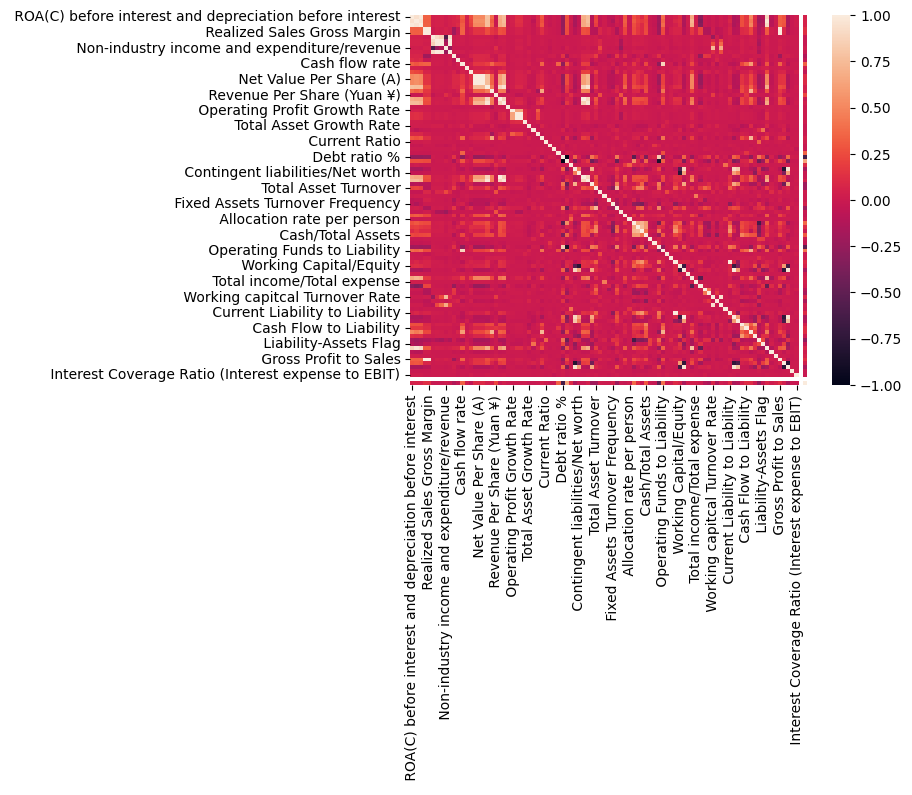

In [14]:
# 다중공산성 확인
corr = df.drop(columns=['Bankrupt?']).corr()
sns.heatmap(corr)

#전처리

In [15]:
# 이상치 제거

def outliers_removal(feature, feature_name, dataset):
    # 25번째 및 75번째 분위수 계산
    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))  # 분위수 출력
    feat_iqr = q75 - q25  # IQR 계산
    print('iqr: {}'.format(feat_iqr))

    feat_cut_off = feat_iqr * 1.5  # 컷오프 값 계산
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off  # 하한 및 상한 계산
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name + ' Lower: {}'.format(feat_lower))  # 하한 출력
    print(feature_name + ' Upper: {}'.format(feat_upper))  # 상한 출력

    # 이상치 확인
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))  # 이상치 개수 출력
    # print(feature_name + ' outliers:{}'.format(outliers))  # 이상치 값 출력

    # 이상치가 포함된 행 제거
    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)

    return dataset  # 수정된 데이터셋 반환

# 모든 열에 대해 이상치 제거 함수 적용
for col in df:
    new_df = outliers_removal(df[col], str(col), df)  # 각 열에 대해 함수 호출

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
 ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
 ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
 ROA(A) before interest and % after tax Lower: 0.45512156563454
 ROA(A) before interest and % after tax Upper: 0.66957860880942
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------

In [16]:
# 로그 변환 함수

def log_trans(data):
    # 데이터프레임의 각 열에 대해 반복
    for col in data:
        skew = data[col].skew()  # 왜도 계산
        # 왜도가 0.5보다 크거나 -0.5보다 작으면 로그 변환
        if skew > 0.5 or skew < -0.5:
            data[col] = np.log1p(data[col])  # 로그 변환
        else:
            continue  # 변환할 필요가 없는 경우 계속 진행

    return data  # 변환된 데이터 반환

# 로그 변환 적용
data_norm = log_trans(new_df)  # 새로운 데이터프레임에 변환된 데이터 저장

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

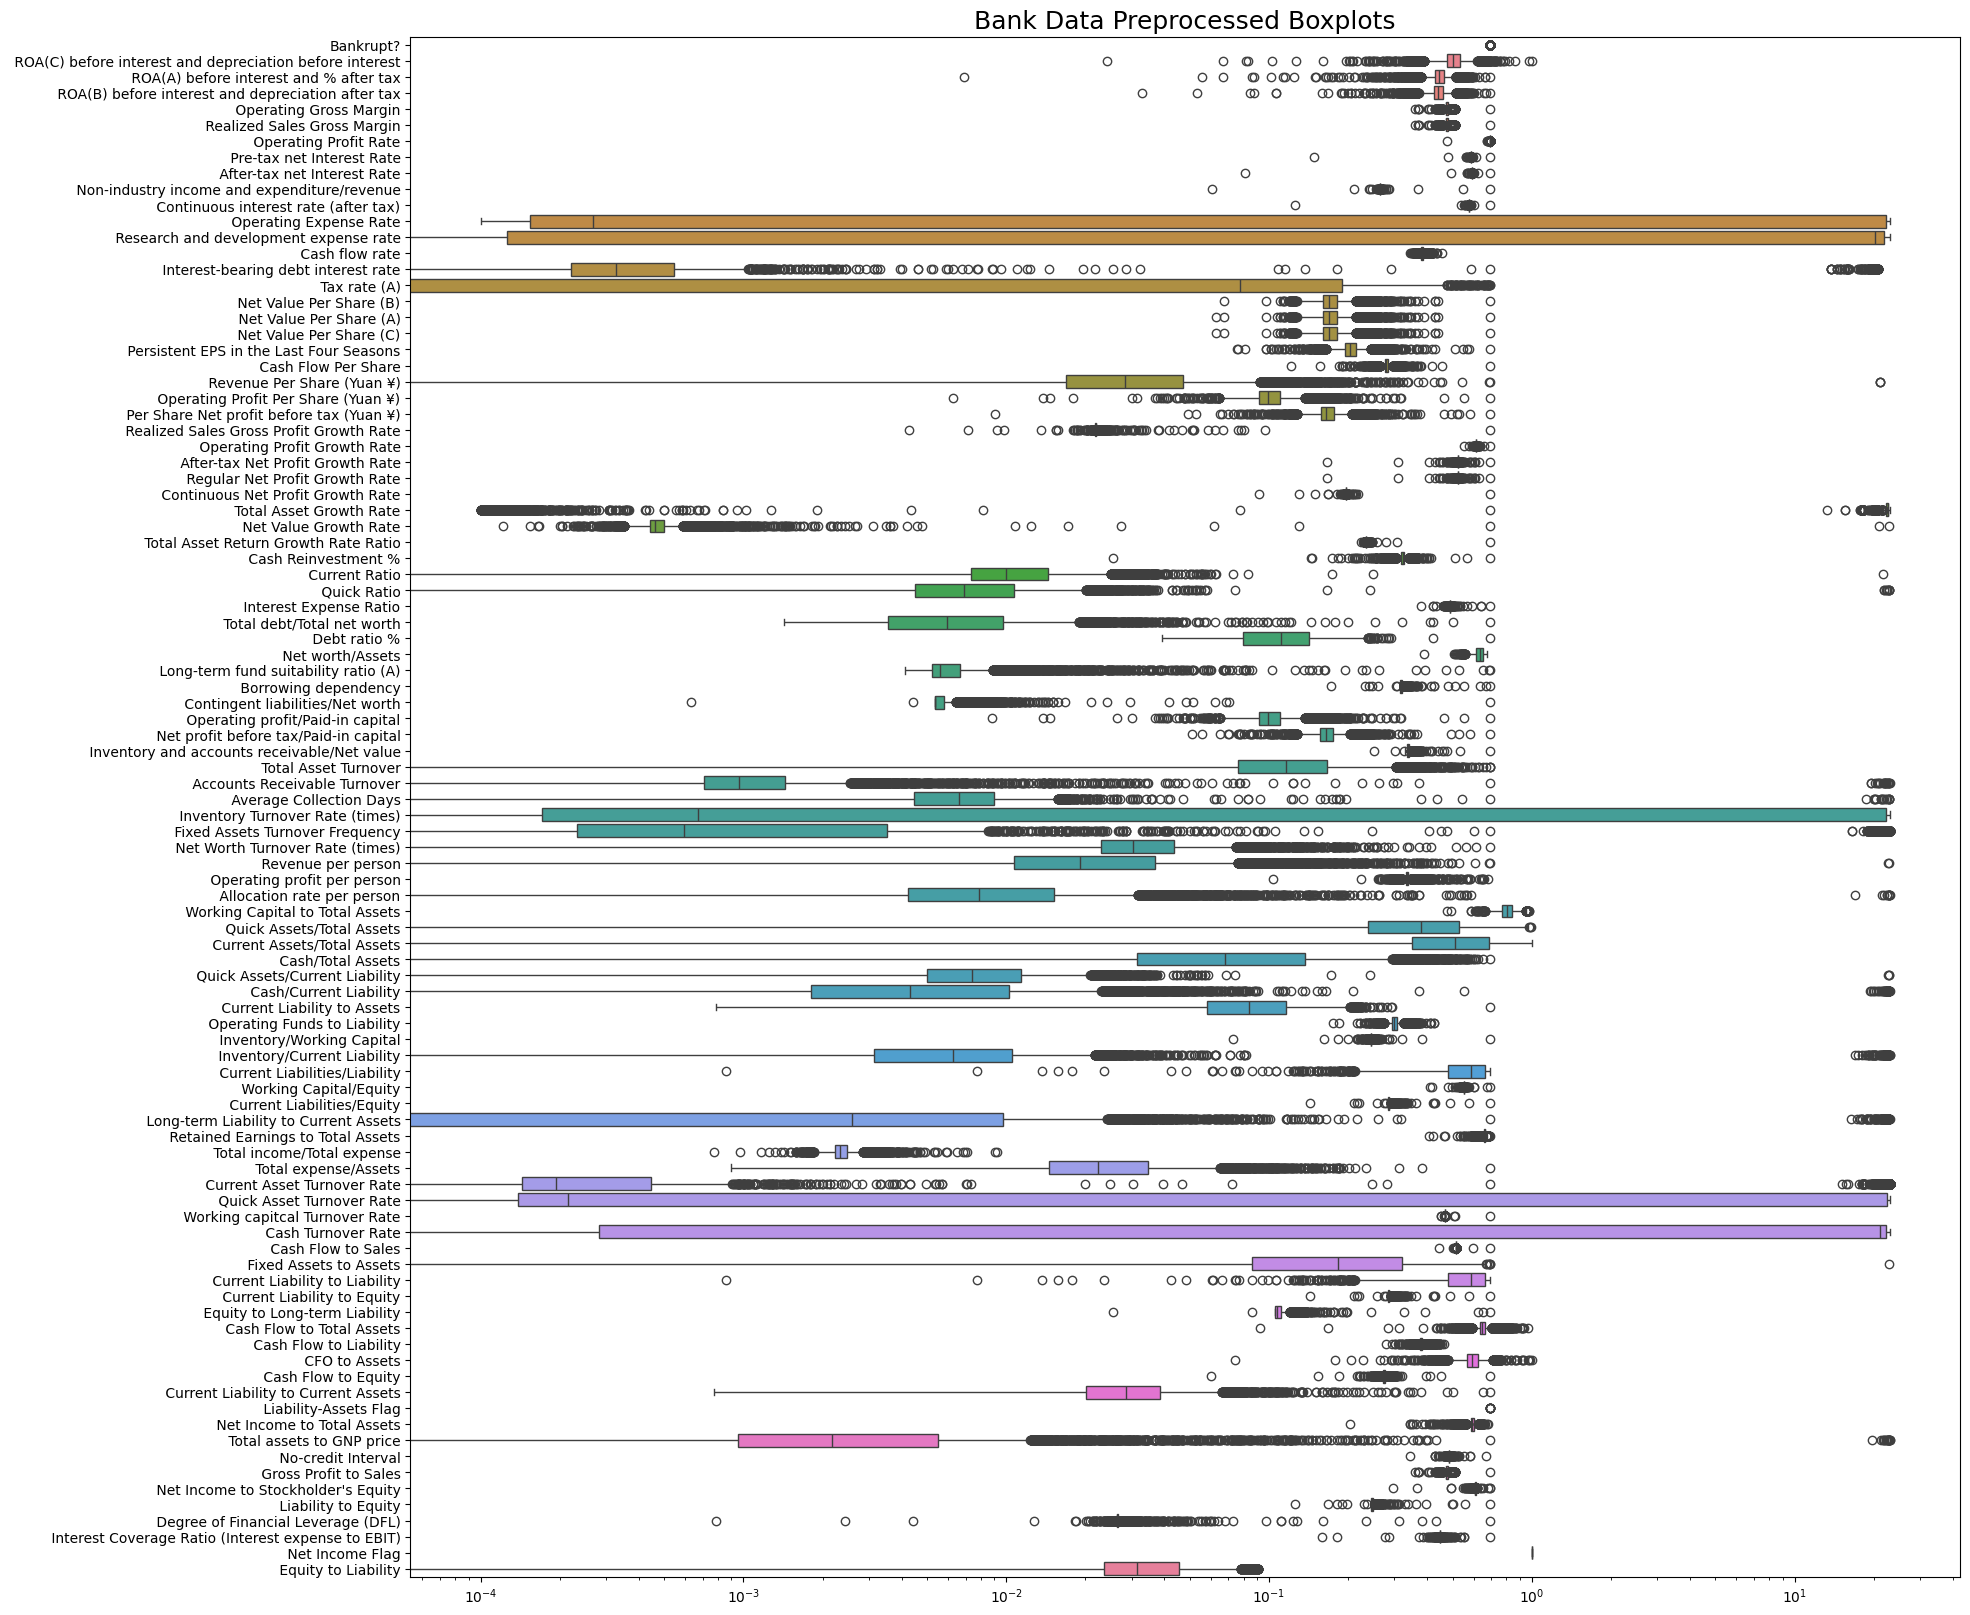

In [17]:
# 전처리된 수치형 특성의 박스플롯 그리기

plt.figure(figsize=(20, 20))  # 그래프 크기 설정
ax = sns.boxplot(data=data_norm, orient="h")  # 수치형 데이터에 대한 수평 박스플롯 생성
ax.set_title('Bank Data Preprocessed Boxplots', fontsize=18)  # 제목 설정
ax.set(xscale="log")  # x축을 로그 스케일로 설정
plt.show()  # 그래프 출력

# 모델링

In [29]:
# 목표 변수 설정
target = "Bankrupt?"

# 목표 변수를 제외한 특성 데이터프레임 생성
X = df.drop(columns=[target])

# 목표 변수 생성
y = df[target]

# X와 y의 형태 출력
print("X shape:", X.shape)  # 특성 데이터의 형태
print("y shape:", y.shape)  # 목표 변수의 형태
print('-'*60)
# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X shape: (6819, 95)
y shape: (6819,)
------------------------------------------------------------
X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


In [30]:
# 랜덤 오버샘플러 초기화
over_sampler = RandomOverSampler(random_state=42)

# 훈련 데이터를 오버샘플링하여 균형을 맞춥니다.
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

# 오버샘플링된 훈련 데이터의 형태 출력
print(X_train_over.shape)

# 오버샘플링된 훈련 데이터의 상위 5개 행 출력
X_train_over.head()

(10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


In [31]:
# 훈련 데이터에서 가장 높은 클래스 비율을 계산하여 기준선 정확도를 설정합니다.
acc_baseline = y_train.value_counts(normalize=True).max()

# 기준선 정확도를 소수점 4자리로 반올림하여 출력합니다.
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


In [32]:
# 랜덤 포레스트 분류기 초기화
clf = RandomForestClassifier(random_state=42)

In [33]:
# 랜덤 포레스트 모델의 하이퍼파라미터를 설정합니다.
params = {
    "n_estimators": range(25, 100, 25),  # 결정 트리의 개수
    "max_depth": range(10, 70, 10)       # 트리의 최대 깊이
}

params  # 설정된 하이퍼파라미터 출력

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 70, 10)}

In [34]:
# 랜덤 포레스트 분류기에 대한 그리드 서치를 설정합니다.
model = GridSearchCV(
    clf,                     # 분류기
    param_grid=params,      # 하이퍼파라미터 그리드
    cv=5,                    # 5겹 교차 검증
    n_jobs=-1,              # 모든 CPU 코어를 사용하여 병렬 처리
    verbose=1               # 진행 상황을 자세히 출력
)

model  # 설정된 그리드 서치 모델 출력

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [35]:
# 오버샘플링된 훈련 데이터로 그리드 서치 모델을 학습시킵니다.
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [36]:
# 그리드 서치의 교차 검증 결과를 데이터프레임으로 변환합니다.
cv_results = pd.DataFrame(model.cv_results_)

In [37]:
# 그리드 서치에서 찾은 최적의 하이퍼파라미터를 출력합니다.
model.best_params_

{'max_depth': 50, 'n_estimators': 50}

In [38]:
# 오버샘플링된 훈련 데이터에 대해 예측을 수행합니다.
predictions = model.predict(X_train_over)

In [39]:
# 오버샘플링된 훈련 데이터에 대한 정확도를 계산합니다.
acc_train = model.score(X_train_over, y_train_over)

# 테스트 데이터에 대한 정확도를 계산합니다.
acc_test = model.score(X_test, y_test)

# 훈련 정확도와 테스트 정확도를 소수점 4자리로 반올림하여 출력합니다.
print(f"Training accuracy: {round(acc_train, 4)}")
print(f"Test accuracy: {round(acc_test, 4)}")

Training accuracy: 1.0
Test accuracy: 0.967


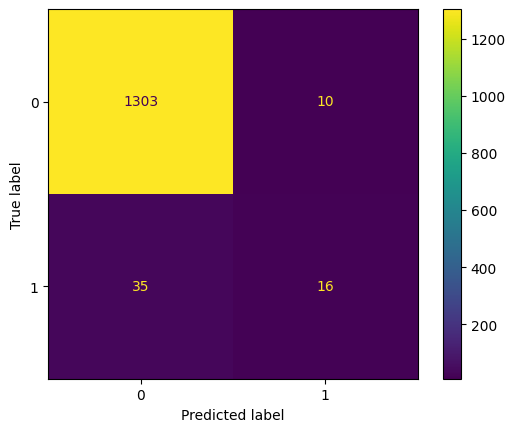

In [40]:
ConfusionMatrixDisplay.from_estimator(
    model,   # 학습된 모델
    X_test,  # 테스트 데이터
    y_test   # 실제 레이블
)

In [41]:
print(classification_report(
    y_test,                   # 실제 레이블
    model.predict(X_test)     # 모델의 예측 결과
))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.62      0.31      0.42        51

    accuracy                           0.97      1364
   macro avg       0.79      0.65      0.70      1364
weighted avg       0.96      0.97      0.96      1364

